# Task 3-2

## Import task1_2_1

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False
plt.style.use('ggplot')

data2 = pd.read_csv('../result1/task1_2_1.csv', encoding='gbk')

newdata = data2.loc[:, [
    'Count_consumption', 'Total_consumption', 'Recent_consumption'
]]

## Standardize

In [2]:
from sklearn.preprocessing import StandardScaler

newdata_std = StandardScaler().fit_transform(newdata)

## Training model

In [3]:
from sklearn.cluster import KMeans


def trainModel(data):
    kmeans_model = KMeans(n_clusters=3, n_jobs=4, random_state=123)
    fit_kmeans = kmeans_model.fit(data)
    return kmeans_model


model = trainModel(newdata_std)

model.cluster_centers_

array([[-0.30509321,  0.53654206, -0.75642829],
       [-0.33915525, -0.54352977,  0.78744492],
       [ 1.95105236, -0.09514375,  0.07219801]])

In [4]:
finally_ = pd.DataFrame(newdata_std,index=data2['CardNo'],columns=newdata.columns)
finally_['tag'] = model.labels_

In [5]:
group1 = finally_.groupby(by='tag').get_group(0)
group2 = finally_.groupby(by='tag').get_group(1)
group3 = finally_.groupby(by='tag').get_group(2)

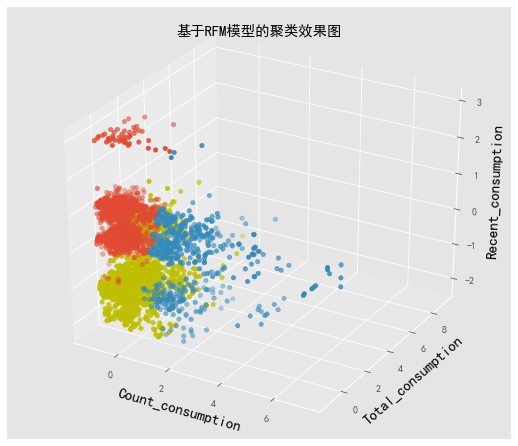

In [6]:
from mpl_toolkits.mplot3d import Axes3D  # Three-dimensional drawing of space

fig = plt.figure(figsize=(7,6))
ax = Axes3D(fig)

x1 = group1.values[:,0]
y1 = group1.values[:,1]
z1 = group1.values[:,2]

ax.scatter(x1, y1, z1, c='y',label='group1')

x2 = group2.values[:,0]
y2 = group2.values[:,1]
z2 = group2.values[:,2]

ax.scatter(x2, y2, z2, label='group2')

x3 = group3.values[:,0]
y3 = group3.values[:,1]
z3 = group3.values[:,2]

ax.scatter(x3, y3, z3,  label='group3')

ax.set_xlabel('Count_consumption', fontdict={'size': 15, 'color': 'black'})
ax.set_ylabel('Total_consumption', fontdict={'size': 15, 'color': 'black'})
ax.set_zlabel('Recent_consumption', fontdict={'size': 15, 'color': 'black'})

q = plt.title('基于RFM模型的聚类效果图')

The ones that are close to the X-axis are consistent

In [7]:
group3

,Count_consumption,Total_consumption,Recent_consumption,tag
CardNo,,,,
180045,6.707170,-0.419598,0.236994,2
180046,6.709500,1.027456,0.263123,2
180047,6.706005,-0.258814,0.236994,2
180048,6.708335,-1.030577,0.266855,2
180049,6.703676,-1.094890,0.240726,2
...,...,...,...,...
184335,2.426305,-0.258814,0.278053,2
184336,2.422811,-0.580382,-0.920147,2
184337,2.421646,-0.162344,1.117914,2


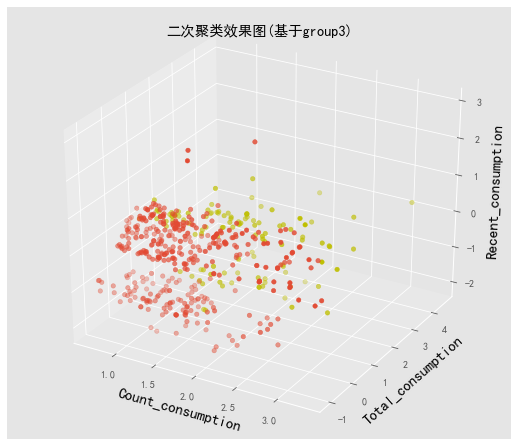

In [8]:
model = trainModel(group3.values)

new_group3 = group3.loc[:,['Count_consumption','Total_consumption','Recent_consumption']]
new_group3['tag'] = model.labels_

group3_1 = new_group3.groupby(by='tag').get_group(0)
group3_2 = new_group3.groupby(by='tag').get_group(1)

fig2 = plt.figure(figsize=(7,6))
ax2 = Axes3D(fig2)

x1 = group3_1.values[:,0]
y1 = group3_1.values[:,1]
z1 = group3_1.values[:,2]

ax2.scatter(x1, y1, z1, label='group3_1')

x2 = group3_2.values[:,0]
y2 = group3_2.values[:,1]
z2 = group3_2.values[:,2]

ax2.scatter(x2, y2, z2, label='group3_2',c='y')

ax2.set_xlabel('Count_consumption', fontdict={'size': 15, 'color': 'black'})
ax2.set_ylabel('Total_consumption', fontdict={'size': 15, 'color': 'black'})
ax2.set_zlabel('Recent_consumption', fontdict={'size': 15, 'color': 'black'})

q = plt.title('二次聚类效果图(基于group3)')

In [9]:
# That's what's filtered out
group3_2.to_csv('../result3/needy_students.csv',encoding='gbk')